### Import Libraries (Exercise 1: Creating ML Model & Exercise 2: Publishing ML Model)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load data and explore

In [2]:
df = pd.read_csv("Lemonade.csv")

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
# Print statistics for Temperature and Sales
df[['Temperature','Sales']].describe()

,Temperature,Sales
count,365.000000,365.000000
mean,60.731233,25.323288
std,16.196266,6.893589
min,15.100000,7.000000
25%,49.700000,20.000000
50%,61.100000,25.000000
75%,71.300000,30.000000
max,102.900000,43.000000


In [6]:
# Print correlation for temperature vs Sales
print('\nCorrelation:')
df['Temperature'].corr(df['Sales'])


Correlation:


0.9898320849779698

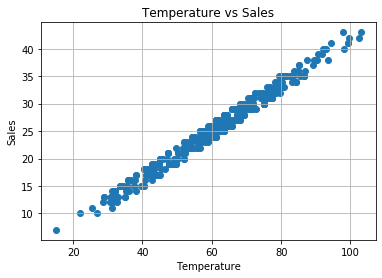

In [7]:
# Plot Temperature vs Sales 
plt.xlabel('Temperature') 
plt.ylabel('Sales') 
plt.grid()
plt.title("Temperature vs Sales")
plt.scatter(df['Temperature'],df['Sales']) 
plt.show()

In [8]:
rainfall = df['Rainfall']

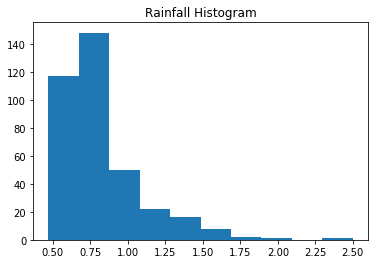

In [9]:
plt.title("Rainfall Histogram")
plt.hist(rainfall, bins=10)
plt.show()

In [10]:
sales = df['Sales']

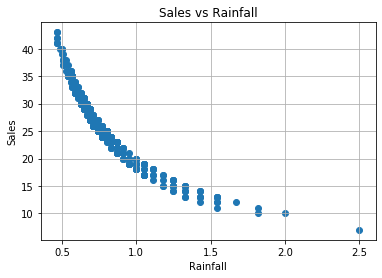

In [11]:
# Plot Sales vs Rainfall
plt.xlabel('Rainfall') 
plt.ylabel('Sales') 
plt.grid()
plt.title("Sales vs Rainfall")
plt.scatter(df['Rainfall'],df['Sales']) 
plt.show()

In [12]:
df['rainfall_log_value'] = np.log(df['Rainfall'])
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,rainfall_log_value
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10,0.693147
1,02/01/2017,Monday,28.9,1.33,15,0.3,13,0.285179
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15,0.285179
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17,0.048790
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18,0.000000
...,...,...,...,...,...,...,...,...
360,27/12/2017,Wednesday,42.7,1.00,33,0.3,19,0.000000
361,28/12/2017,Thursday,37.8,1.25,32,0.3,16,0.223144
362,29/12/2017,Friday,39.5,1.25,17,0.3,15,0.223144
363,30/12/2017,Saturday,30.9,1.43,22,0.3,13,0.357674


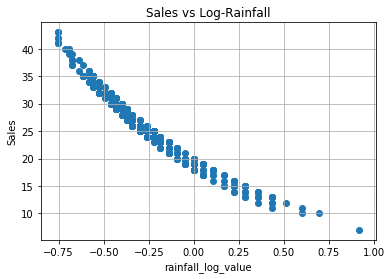

In [13]:
# Plot Sales vs Log-Rainfall
plt.xlabel('rainfall_log_value') 
plt.ylabel('Sales') 
plt.grid()
plt.title("Sales vs Log-Rainfall")
plt.scatter(df['rainfall_log_value'],df['Sales']) 
plt.show()

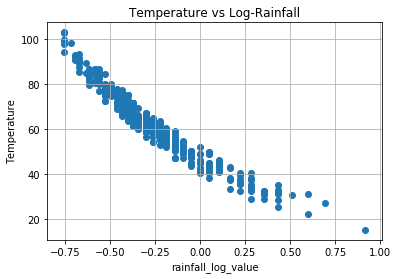

In [14]:
# Plot Temperature vs Log-Rainfall
plt.xlabel('rainfall_log_value') 
plt.ylabel('Temperature') 
plt.grid()
plt.title("Temperature vs Log-Rainfall")
plt.scatter(df['rainfall_log_value'],df['Temperature']) 
plt.show()

### Transform data for training

In [15]:
df_scaled = df[["Temperature","Flyers"]]

In [16]:
df_scaled

,Temperature,Flyers
0,27.0,15
1,28.9,15
2,34.5,27
3,44.1,28
4,42.4,33
...,...,...
360,42.7,33
361,37.8,32
362,39.5,17
363,30.9,22


In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(df_scaled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
df_trans = scaler.transform(df_scaled)

In [20]:
df_trans

array([[-2.08551378, -1.92126193],
       [-1.96804175, -1.92126193],
       [-1.62180842, -1.00944838],
       [-1.02826557, -0.93346392],
       [-1.13337211, -0.5535416 ],
       [-2.19062032, -1.31338623],
       [-1.72073223, -1.61732408],
       [-1.43632628, -0.93346392],
       [-1.39922985, -1.54133962],
       [-1.07154473, -0.5535416 ],
       [-1.73928045, -1.31338623],
       [-1.39304711, -1.84527747],
       [-1.43632628, -1.61732408],
       [-1.02826557, -1.31338623],
       [-1.07154473, -0.5535416 ],
       [-1.86293521, -1.23740177],
       [-1.7640114 , -1.08543284],
       [-1.10864116, -0.5535416 ],
       [-1.09009295, -0.78149499],
       [-1.80110783, -1.54133962],
       [-1.51670187, -1.84527747],
       [-1.23229592, -1.61732408],
       [-1.39922985, -1.46535515],
       [-1.98658997, -1.54133962],
       [-1.7640114 , -1.23740177],
       [-1.54143283, -1.69330854],
       [-1.15192033, -1.38937069],
       [-1.59707747, -1.92126193],
       [-1.57852926,

In [21]:
new_scaled = pd.DataFrame(data=df_trans,columns=df_scaled.columns)

In [22]:
new_scaled

,Temperature,Flyers
0,-2.085514,-1.921262
1,-1.968042,-1.921262
2,-1.621808,-1.009448
3,-1.028266,-0.933464
4,-1.133372,-0.553542
...,...,...
360,-1.114824,-0.553542
361,-1.417778,-0.629526
362,-1.312672,-1.769293
363,-1.844387,-1.389371


In [23]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,rainfall_log_value
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10,0.693147
1,02/01/2017,Monday,28.9,1.33,15,0.3,13,0.285179
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15,0.285179
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17,0.048790
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18,0.000000
...,...,...,...,...,...,...,...,...
360,27/12/2017,Wednesday,42.7,1.00,33,0.3,19,0.000000
361,28/12/2017,Thursday,37.8,1.25,32,0.3,16,0.223144
362,29/12/2017,Friday,39.5,1.25,17,0.3,15,0.223144
363,30/12/2017,Saturday,30.9,1.43,22,0.3,13,0.357674


In [24]:
df = df.drop(["Temperature","Flyers"],axis=1)

In [25]:
df.head()

,Date,Day,Rainfall,Price,Sales,rainfall_log_value
0,01/01/2017,Sunday,2.00,0.3,10,0.693147
1,02/01/2017,Monday,1.33,0.3,13,0.285179
2,03/01/2017,Tuesday,1.33,0.3,15,0.285179
3,04/01/2017,Wednesday,1.05,0.3,17,0.048790
4,05/01/2017,Thursday,1.00,0.3,18,0.000000


In [26]:
df1 = pd.concat([df,new_scaled],axis=1)

In [27]:
#New dataframe containing Z-score for Temperature and Flyers

df1

,Date,Day,Rainfall,Price,Sales,rainfall_log_value,Temperature,Flyers
0,01/01/2017,Sunday,2.00,0.3,10,0.693147,-2.085514,-1.921262
1,02/01/2017,Monday,1.33,0.3,13,0.285179,-1.968042,-1.921262
2,03/01/2017,Tuesday,1.33,0.3,15,0.285179,-1.621808,-1.009448
3,04/01/2017,Wednesday,1.05,0.3,17,0.048790,-1.028266,-0.933464
4,05/01/2017,Thursday,1.00,0.3,18,0.000000,-1.133372,-0.553542
...,...,...,...,...,...,...,...,...
360,27/12/2017,Wednesday,1.00,0.3,19,0.000000,-1.114824,-0.553542
361,28/12/2017,Thursday,1.25,0.3,16,0.223144,-1.417778,-0.629526
362,29/12/2017,Friday,1.25,0.3,15,0.223144,-1.312672,-1.769293
363,30/12/2017,Saturday,1.43,0.3,13,0.357674,-1.844387,-1.389371


In [28]:
df_scaled2 = df[["rainfall_log_value","Price"]]

In [29]:
df_scaled2

,rainfall_log_value,Price
0,0.693147,0.3
1,0.285179,0.3
2,0.285179,0.3
3,0.048790,0.3
4,0.000000,0.3
...,...,...
360,0.000000,0.3
361,0.223144,0.3
362,0.223144,0.3
363,0.357674,0.3


In [30]:
scaler2 = MinMaxScaler()

In [31]:
scaler2.fit(df_scaled2)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
df_trans2 = scaler2.transform(df_scaled2)

In [33]:
df_trans2

array([[0.8664861 , 0.        ],
       [0.62238571, 0.        ],
       [0.62238571, 0.        ],
       [0.48094677, 0.        ],
       [0.45175406, 0.        ],
       [0.71010324, 0.        ],
       [0.71010324, 0.        ],
       [0.55078663, 0.        ],
       [0.55078663, 0.        ],
       [0.48094677, 0.        ],
       [0.71010324, 0.        ],
       [0.62238571, 0.        ],
       [0.62238571, 0.        ],
       [0.48094677, 0.        ],
       [0.51419599, 0.        ],
       [0.75859278, 0.        ],
       [0.66576208, 0.        ],
       [0.55078663, 0.        ],
       [0.55078663, 0.        ],
       [0.66576208, 0.        ],
       [0.58526796, 0.        ],
       [0.51419599, 0.        ],
       [0.48094677, 0.        ],
       [0.71010324, 0.        ],
       [0.58526796, 0.        ],
       [0.58526796, 0.        ],
       [0.48094677, 0.        ],
       [0.62238571, 0.        ],
       [0.62238571, 0.        ],
       [0.48094677, 0.        ],
       [0.

In [34]:
new_scaled2 = pd.DataFrame(data=df_trans2,columns=df_scaled2.columns)

In [35]:
new_scaled2

,rainfall_log_value,Price
0,0.866486,0.0
1,0.622386,0.0
2,0.622386,0.0
3,0.480947,0.0
4,0.451754,0.0
...,...,...
360,0.451754,0.0
361,0.585268,0.0
362,0.585268,0.0
363,0.665762,0.0


In [36]:
df1 = df1.drop(["Rainfall","Price","rainfall_log_value"],axis=1)

In [37]:
df1

,Date,Day,Sales,Temperature,Flyers
0,01/01/2017,Sunday,10,-2.085514,-1.921262
1,02/01/2017,Monday,13,-1.968042,-1.921262
2,03/01/2017,Tuesday,15,-1.621808,-1.009448
3,04/01/2017,Wednesday,17,-1.028266,-0.933464
4,05/01/2017,Thursday,18,-1.133372,-0.553542
...,...,...,...,...,...
360,27/12/2017,Wednesday,19,-1.114824,-0.553542
361,28/12/2017,Thursday,16,-1.417778,-0.629526
362,29/12/2017,Friday,15,-1.312672,-1.769293
363,30/12/2017,Saturday,13,-1.844387,-1.389371


In [38]:
df2 = pd.concat([df1,new_scaled2],axis=1)

In [39]:
# New dataframe contains Minmax Norm for rainfall log and Price
df2

,Date,Day,Sales,Temperature,Flyers,rainfall_log_value,Price
0,01/01/2017,Sunday,10,-2.085514,-1.921262,0.866486,0.0
1,02/01/2017,Monday,13,-1.968042,-1.921262,0.622386,0.0
2,03/01/2017,Tuesday,15,-1.621808,-1.009448,0.622386,0.0
3,04/01/2017,Wednesday,17,-1.028266,-0.933464,0.480947,0.0
4,05/01/2017,Thursday,18,-1.133372,-0.553542,0.451754,0.0
...,...,...,...,...,...,...,...
360,27/12/2017,Wednesday,19,-1.114824,-0.553542,0.451754,0.0
361,28/12/2017,Thursday,16,-1.417778,-0.629526,0.585268,0.0
362,29/12/2017,Friday,15,-1.312672,-1.769293,0.585268,0.0
363,30/12/2017,Saturday,13,-1.844387,-1.389371,0.665762,0.0


In [40]:
#Save a csv file 

#df2.to_csv("lab4.csv",index=False)

In [41]:
df2 = pd.read_csv("lab4.csv")

In [42]:
#The Date and Day columns aren’t likely to help predict sales volumes, 
#and Sales column is the label the model will predict; 
#so these fields should not be used as features to train the model.

In [43]:
#Drop Date and Day columns
df2 = df2.drop(["Date","Day"],axis=1)

In [44]:
df2

,Sales,Temperature,Flyers,rainfall_log_value,Price
0,10,-2.085514,-1.921262,0.866486,0.0
1,13,-1.968042,-1.921262,0.622386,0.0
2,15,-1.621808,-1.009448,0.622386,0.0
3,17,-1.028266,-0.933464,0.480947,0.0
4,18,-1.133372,-0.553542,0.451754,0.0
...,...,...,...,...,...
360,19,-1.114824,-0.553542,0.451754,0.0
361,16,-1.417778,-0.629526,0.585268,0.0
362,15,-1.312672,-1.769293,0.585268,0.0
363,13,-1.844387,-1.389371,0.665762,0.0


In [45]:
#Rearrange columns
df2 = df2[['Temperature', 'Flyers', 'rainfall_log_value','Price','Sales']]

In [46]:
df2.head()

,Temperature,Flyers,rainfall_log_value,Price,Sales
0,-2.085514,-1.921262,0.866486,0.0,10
1,-1.968042,-1.921262,0.622386,0.0,13
2,-1.621808,-1.009448,0.622386,0.0,15
3,-1.028266,-0.933464,0.480947,0.0,17
4,-1.133372,-0.553542,0.451754,0.0,18


In [47]:
#df2.to_csv("lab4q1.csv",index=False)

In [48]:
X = df2.iloc[:,0:4]
y = df2.iloc[:,4]

In [49]:
X

,Temperature,Flyers,rainfall_log_value,Price
0,-2.085514,-1.921262,0.866486,0.0
1,-1.968042,-1.921262,0.622386,0.0
2,-1.621808,-1.009448,0.622386,0.0
3,-1.028266,-0.933464,0.480947,0.0
4,-1.133372,-0.553542,0.451754,0.0
...,...,...,...,...
360,-1.114824,-0.553542,0.451754,0.0
361,-1.417778,-0.629526,0.585268,0.0
362,-1.312672,-1.769293,0.585268,0.0
363,-1.844387,-1.389371,0.665762,0.0


In [50]:
y

0      10
1      13
2      15
3      17
4      18
       ..
360    19
361    16
362    15
363    13
364     7
Name: Sales, Length: 365, dtype: int64

In [51]:
X.values, y.values

(array([[-2.08551378, -1.92126193,  0.8664861 ,  0.        ],
        [-1.96804175, -1.92126193,  0.62238571,  0.        ],
        [-1.62180842, -1.00944838,  0.62238571,  0.        ],
        ...,
        [-1.31267152, -1.769293  ,  0.58526796,  0.        ],
        [-1.84438699, -1.38937069,  0.66576208,  0.        ],
        [-2.82125961, -2.3771687 ,  1.        ,  0.        ]]),
 array([10, 13, 15, 17, 18, 11, 13, 15, 17, 18, 12, 14, 15, 17, 18, 12, 14,
        16, 17, 12, 14, 16, 17, 12, 14, 16, 17, 13, 14, 17, 18, 18, 20, 21,
        22, 18, 20, 21, 22, 19, 20, 21, 22, 18, 19, 20, 21, 18, 19, 20, 21,
        18, 19, 20, 21, 18, 19, 20, 22, 23, 24, 24, 25, 23, 24, 24, 25, 23,
        24, 24, 25, 23, 23, 24, 24, 25, 23, 23, 24, 24, 25, 23, 23, 24, 25,
        25, 23, 24, 24, 25, 25, 26, 26, 27, 28, 25, 26, 26, 27, 25, 26, 27,
        27, 25, 26, 27, 27, 25, 26, 27, 27, 25, 26, 27, 27, 25, 25, 26, 27,
        27, 29, 29, 30, 31, 28, 29, 29, 30, 31, 28, 29, 29, 30, 31, 28, 29,
     

### Model Training

In [52]:
#Split for training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [53]:
X_train.shape, X_test.shape

((255, 4), (110, 4))

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_predict = model.predict(X_test)

In [57]:
y_predict  #Prediction results

array([27.06370602, 25.73894764, 21.67304803, 17.70389377, 24.57217472,
       12.85201278, 24.12561159, 19.24296089, 32.46776705, 12.54216044,
       28.39179698, 29.29930949, 25.63748745, 25.16296497, 26.6346687 ,
       33.08044905, 24.37946826, 27.17229065, 30.13781203, 29.44920684,
       31.37864833, 35.01730874, 23.84954152, 23.46060861, 24.59062203,
       25.97428825, 24.39322429, 20.74946003, 27.46755212, 35.11391266,
       28.43185037, 26.24251186, 11.39534451, 22.09574581, 20.55983365,
       10.28652843, 24.01666981, 29.1843158 , 26.81704255, 25.43100118,
       32.45945708, 23.41170003, 31.92903614, 27.09961039, 14.79496229,
       22.2755927 , 32.06640068, 31.71115258, 31.40798031, 25.16624755,
       32.60793887, 32.22146072, 32.10519923, 33.28966879, 25.7672517 ,
       18.08566949, 20.13868195, 27.89427054, 24.80102399, 22.80371228,
       22.04887573, 28.06910654, 15.65273396, 25.6104496 , 22.84234894,
       12.48579897, 19.78700868, 29.87214919, 29.59983293, 31.96

In [58]:
y_predict.shape

(110,)

In [59]:
y_test.shape

(110,)

In [60]:
y_predict = pd.DataFrame(y_predict)

In [61]:
y_predict

,0
0,27.063706
1,25.738948
2,21.673048
3,17.703894
4,24.572175
...,...
105,32.456064
106,29.868444
107,23.545364
108,29.859673


In [62]:
y_test = pd.DataFrame(y_test)

In [63]:
y_test

,Sales
106,27
259,26
45,20
26,17
78,24
...,...
217,31
145,30
318,23
234,29


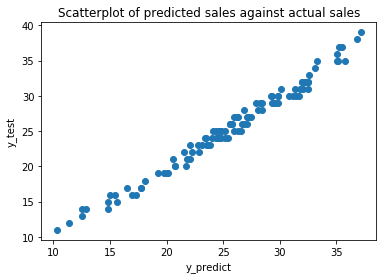

In [64]:
# y_test vs y_predict 
plt.xlabel('y_predict') 
plt.ylabel('y_test') 
plt.title("Scatterplot of predicted sales against actual sales")
plt.scatter(x=y_predict,y=y_test)
plt.show()

### Model Evaluation

In [65]:
mae = mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error is',mae)

Mean Absolute Error is 0.6962318017105759


In [66]:
mse = mean_squared_error(y_test,y_predict)
print('Mean Squared Error is',mse)

Mean Squared Error is 0.6845324968598573


In [67]:
rmse = math.sqrt(mse)
print('Root Mean Squared Error is',rmse)

Root Mean Squared Error is 0.8273647906817507


In [68]:
EPSILON = 1e-10

In [69]:
def rae(actual: np.ndarray, predicted: np.ndarray):
    """ Relative Absolute Error (aka Approximation Error) """
    return np.sum(np.abs(actual - predicted)) / (np.sum(np.abs(actual - np.mean(actual))) + EPSILON)

In [70]:
y_test.values

array([[27],
       [26],
       [20],
       [17],
       [24],
       [14],
       [25],
       [19],
       [32],
       [13],
       [29],
       [30],
       [26],
       [25],
       [26],
       [34],
       [25],
       [27],
       [31],
       [29],
       [31],
       [36],
       [23],
       [24],
       [24],
       [27],
       [24],
       [20],
       [27],
       [35],
       [28],
       [27],
       [12],
       [21],
       [21],
       [11],
       [24],
       [30],
       [26],
       [24],
       [32],
       [24],
       [32],
       [26],
       [14],
       [22],
       [31],
       [30],
       [30],
       [24],
       [33],
       [32],
       [32],
       [35],
       [26],
       [18],
       [19],
       [29],
       [25],
       [23],
       [23],
       [28],
       [15],
       [26],
       [22],
       [14],
       [19],
       [30],
       [29],
       [32],
       [24],
       [37],
       [27],
       [25],
       [23],
       [30],
       [21],

In [71]:
y_predict.values

array([[27.06370602],
       [25.73894764],
       [21.67304803],
       [17.70389377],
       [24.57217472],
       [12.85201278],
       [24.12561159],
       [19.24296089],
       [32.46776705],
       [12.54216044],
       [28.39179698],
       [29.29930949],
       [25.63748745],
       [25.16296497],
       [26.6346687 ],
       [33.08044905],
       [24.37946826],
       [27.17229065],
       [30.13781203],
       [29.44920684],
       [31.37864833],
       [35.01730874],
       [23.84954152],
       [23.46060861],
       [24.59062203],
       [25.97428825],
       [24.39322429],
       [20.74946003],
       [27.46755212],
       [35.11391266],
       [28.43185037],
       [26.24251186],
       [11.39534451],
       [22.09574581],
       [20.55983365],
       [10.28652843],
       [24.01666981],
       [29.1843158 ],
       [26.81704255],
       [25.43100118],
       [32.45945708],
       [23.41170003],
       [31.92903614],
       [27.09961039],
       [14.79496229],
       [22

In [72]:
rae1 = rae(y_test,y_predict)
print("Relative Absolute Error is",rae1)

Relative Absolute Error is 0        NaN
Sales    0.0
dtype: float64


In [73]:
def rse(actual: np.ndarray, predicted: np.ndarray):
    """ Relative Squared Error """
    return (np.sum(np.square(actual - predicted)) / np.sum(np.square(actual - np.mean(actual))))

In [74]:
rse1 = rse(y_test,y_predict)
print("Relative Squared Error is",rse1)

Relative Squared Error is 0        NaN
Sales    0.0
dtype: float64


In [75]:
cod = r2_score(y_test,y_predict)
print("Coefficient of Determination is",cod)

Coefficient of Determination is 0.9817831771901525


### Model Prediction for Question 1 - Need to load test.csv (input the test values as csv file)

In [76]:
testdata = pd.read_csv("test.csv")

In [77]:
testdata

,Date,Day,Temperature,Rainfall,Flyers,Price
0,1/1/2018,Monday,37.6,0.80,100,0.3
1,2/1/2018,Tuesday,41.2,1.02,100,0.3


### Transform the features first (same as lemonade.csv)

In [78]:
testdata['rainfall_log_value'] = np.log(testdata['Rainfall'])

In [79]:
testdata

,Date,Day,Temperature,Rainfall,Flyers,Price,rainfall_log_value
0,1/1/2018,Monday,37.6,0.80,100,0.3,-0.223144
1,2/1/2018,Tuesday,41.2,1.02,100,0.3,0.019803


In [80]:
test_scaled = testdata[["Temperature","Flyers"]]

In [81]:
test_scaled

,Temperature,Flyers
0,37.6,100
1,41.2,100


In [82]:
scaler = StandardScaler()

In [83]:
scaler.fit(test_scaled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
test_trans = scaler.transform(test_scaled)

In [85]:
test_trans

array([[-1.,  0.],
       [ 1.,  0.]])

In [86]:
new_scaled = pd.DataFrame(data=test_trans,columns=test_scaled.columns)

In [87]:
new_scaled

,Temperature,Flyers
0,-1.0,0.0
1,1.0,0.0


In [88]:
df3 = testdata.drop(["Temperature","Flyers"],axis=1)

In [89]:
df3

,Date,Day,Rainfall,Price,rainfall_log_value
0,1/1/2018,Monday,0.80,0.3,-0.223144
1,2/1/2018,Tuesday,1.02,0.3,0.019803


In [90]:
df3 = pd.concat([df3,new_scaled],axis=1)

In [91]:
df3

,Date,Day,Rainfall,Price,rainfall_log_value,Temperature,Flyers
0,1/1/2018,Monday,0.80,0.3,-0.223144,-1.0,0.0
1,2/1/2018,Tuesday,1.02,0.3,0.019803,1.0,0.0


In [92]:
test_scaled2 = testdata[["rainfall_log_value","Price"]]

In [93]:
test_scaled2

,rainfall_log_value,Price
0,-0.223144,0.3
1,0.019803,0.3


In [94]:
scaler2 = MinMaxScaler()

In [95]:
scaler2.fit(test_scaled2)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [96]:
test_trans2 = scaler2.transform(test_scaled2)

In [97]:
test_trans2

array([[0., 0.],
       [1., 0.]])

In [98]:
test_scaled2 = pd.DataFrame(data=test_trans2,columns=test_scaled2.columns)

In [99]:
test_scaled2

,rainfall_log_value,Price
0,0.0,0.0
1,1.0,0.0


In [100]:
df4 = df3.drop(["Rainfall","Price","rainfall_log_value"],axis=1)

In [101]:
df4

,Date,Day,Temperature,Flyers
0,1/1/2018,Monday,-1.0,0.0
1,2/1/2018,Tuesday,1.0,0.0


In [102]:
df4 = pd.concat([df4,test_scaled2],axis=1)

In [103]:
df4

,Date,Day,Temperature,Flyers,rainfall_log_value,Price
0,1/1/2018,Monday,-1.0,0.0,0.0,0.0
1,2/1/2018,Tuesday,1.0,0.0,1.0,0.0


In [108]:
#Save as another clean test csv file
#df4.to_csv("cleanedtest.csv",index=False)

In [105]:
df5 = df4.drop(["Date","Day"],axis=1)

In [106]:
df5

,Temperature,Flyers,rainfall_log_value,Price
0,-1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0


In [107]:
df5.shape

(2, 4)

In [109]:
df5.values

array([[-1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.]])

### Do the prediction

In [110]:
model.predict(df5)

array([23.56453453, 23.02845644])

### Result: Not accurate at all!